In [14]:
import pandas as pd

In [28]:
X=pd.read_csv(r"D:\Downloads\soil.csv")

In [29]:
X.head()

,A(410),B(435),C(460),D(485),E(510),F(535),G(560),H(585),R(610),I(645),S(680),J(705),U(760),V(810),W(860),K(900),L(940),T(730)
0,1945.57,992.41,2051.13,707.77,822.51,1371.58,318.71,315.85,1305.33,159.24,329.50,49.90,75.75,237.65,305.23,60.10,36.52,83.32
1,2336.77,816.05,2008.33,693.91,848.56,1691.27,373.00,375.11,1339.28,188.68,308.97,62.27,69.30,242.82,277.02,82.78,44.74,77.27
2,1625.50,1070.13,2472.09,810.33,960.65,1745.17,428.89,436.37,1206.99,226.15,292.57,63.53,68.50,211.82,273.69,88.45,47.47,75.75
3,2557.95,1594.40,2790.56,1008.17,1128.00,1570.73,488.55,499.64,1339.11,261.84,357.22,77.09,77.36,229.90,315.37,98.09,54.78,84.07
4,3262.28,1300.30,2948.80,949.85,1114.58,2049.14,501.99,513.20,1482.11,268.53,338.74,77.09,75.75,260.90,307.48,108.30,55.69,86.69


In [30]:

import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

In [31]:
y=pd.read_csv(r"D:\Downloads\soil_target.csv")

In [32]:
y.head()

,pH,EC (dS/m),OC (%),P (kg/ha),K (kg/ha),Ca (meq/100g),Mg (meq/100g),S (ppm),Fe (ppm),Mn (ppm),Cu (ppm),Zn (ppm),B (ppm)
0,6.72,0.09,1.05,26.10,444.00,6.14,2.32,11.21,3.08,14.10,2.23,0.84,1.22
1,6.04,0.17,0.33,81.99,372.00,5.98,0.50,12.93,47.74,37.63,3.28,6.79,1.13
2,5.35,0.07,0.87,80.59,132.00,3.15,2.49,5.17,14.96,44.53,1.22,1.21,0.98
3,6.38,0.03,0.48,33.81,221.76,3.40,1.90,11.59,6.38,10.62,1.77,0.99,0.27
4,8.58,0.04,0.69,38.19,234.08,6.60,5.20,34.10,14.08,3.56,1.56,0.40,0.77


In [33]:
data=pd.concat([X,y],axis=1)

In [34]:
data.head()

,A(410),B(435),C(460),D(485),E(510),F(535),G(560),H(585),R(610),I(645),S(680),J(705),U(760),V(810),W(860),K(900),L(940),T(730),pH,EC (dS/m),OC (%),P (kg/ha),K (kg/ha),Ca (meq/100g),Mg (meq/100g),S (ppm),Fe (ppm),Mn (ppm),Cu (ppm),Zn (ppm),B (ppm)
0,1945.57,992.41,2051.13,707.77,822.51,1371.58,318.71,315.85,1305.33,159.24,329.50,49.90,75.75,237.65,305.23,60.10,36.52,83.32,6.72,0.09,1.05,26.10,444.00,6.14,2.32,11.21,3.08,14.10,2.23,0.84,1.22
1,2336.77,816.05,2008.33,693.91,848.56,1691.27,373.00,375.11,1339.28,188.68,308.97,62.27,69.30,242.82,277.02,82.78,44.74,77.27,6.04,0.17,0.33,81.99,372.00,5.98,0.50,12.93,47.74,37.63,3.28,6.79,1.13
2,1625.50,1070.13,2472.09,810.33,960.65,1745.17,428.89,436.37,1206.99,226.15,292.57,63.53,68.50,211.82,273.69,88.45,47.47,75.75,5.35,0.07,0.87,80.59,132.00,3.15,2.49,5.17,14.96,44.53,1.22,1.21,0.98
3,2557.95,1594.40,2790.56,1008.17,1128.00,1570.73,488.55,499.64,1339.11,261.84,357.22,77.09,77.36,229.90,315.37,98.09,54.78,84.07,6.38,0.03,0.48,33.81,221.76,3.40,1.90,11.59,6.38,10.62,1.77,0.99,0.27
4,3262.28,1300.30,2948.80,949.85,1114.58,2049.14,501.99,513.20,1482.11,268.53,338.74,77.09,75.75,260.90,307.48,108.30,55.69,86.69,8.58,0.04,0.69,38.19,234.08,6.60,5.20,34.10,14.08,3.56,1.56,0.40,0.77


In [35]:
data.isna().sum()

A(410)           0
B(435)           0
C(460)           0
D(485)           0
E(510)           0
F(535)           0
G(560)           0
H(585)           0
R(610)           0
I(645)           0
S(680)           0
J(705)           0
U(760)           0
V(810)           0
W(860)           0
K(900)           0
L(940)           0
T(730)           0
pH               5
EC  (dS/m)       5
OC (%)           5
P   (kg/ha)      5
K (kg/ha)        5
Ca (meq/100g)    8
Mg (meq/100g)    5
S (ppm)          5
Fe (ppm)         5
Mn (ppm)         5
Cu (ppm)         5
Zn (ppm)         5
B (ppm)          5
dtype: int64

In [36]:
pd.set_option('display.max_columns', None)

In [27]:
print(data.head())

    A(410)   B(435)   C(460)   D(485)   E(510)   F(535)  G(560)  H(585)  \
0  1945.57   992.41  2051.13   707.77   822.51  1371.58  318.71  315.85   
1  2336.77   816.05  2008.33   693.91   848.56  1691.27  373.00  375.11   
2  1625.50  1070.13  2472.09   810.33   960.65  1745.17  428.89  436.37   
3  2557.95  1594.40  2790.56  1008.17  1128.00  1570.73  488.55  499.64   
4  3262.28  1300.30  2948.80   949.85  1114.58  2049.14  501.99  513.20   

    R(610)  I(645)  S(680)  J(705)  U(760)  V(810)  W(860)  K(900)  L(940)  \
0  1305.33  159.24  329.50   49.90   75.75  237.65  305.23   60.10   36.52   
1  1339.28  188.68  308.97   62.27   69.30  242.82  277.02   82.78   44.74   
2  1206.99  226.15  292.57   63.53   68.50  211.82  273.69   88.45   47.47   
3  1339.11  261.84  357.22   77.09   77.36  229.90  315.37   98.09   54.78   
4  1482.11  268.53  338.74   77.09   75.75  260.90  307.48  108.30   55.69   

   T(730)  Unnamed: 18  Unnamed: 19  Unnamed: 20  Unnamed: 21  Unnamed: 22  \
0 

In [37]:
# Impute missing values in features and target
imputer_X = SimpleImputer(strategy='mean')
X_imputed = imputer_X.fit_transform(X)
imputer_y = SimpleImputer(strategy='mean')
y_imputed = imputer_y.fit_transform(y)


In [38]:

# Preprocess the data
scaler_X = RobustScaler()
X_scaled = scaler_X.fit_transform(X_imputed)

In [40]:
# Save the fitted imputer and scaler
import joblib
joblib.dump(imputer_X, 'imputer_X.pkl')
joblib.dump(imputer_y, 'imputer_y.pkl')
joblib.dump(scaler_X, 'scaler_X.pkl')

['scaler_X.pkl']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_imputed, test_size=0.2, random_state=42)

In [42]:
 #Model training with hyperparameter tuning for RandomForestRegressor
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [44]:
rf = RandomForestRegressor(random_state=42)
rf_grid_search = GridSearchCV(estimator=rf, param_grid=rf_param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
rf_grid_search.fit(X_train, y_train)

best_rf_model = rf_grid_search.best_estimator_

In [45]:
# Model training with hyperparameter tuning for KNeighborsRegressor
knn_param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn = KNeighborsRegressor()
knn_grid_search = GridSearchCV(estimator=knn, param_grid=knn_param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
knn_grid_search.fit(X_train, y_train)

best_knn_model = knn_grid_search.best_estimator_

In [46]:

# Model training for DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [48]:
from sklearn.multioutput import MultiOutputRegressor

# Model training for SVR with MultiOutputRegressor
svr = SVR()
multioutput_svr = MultiOutputRegressor(svr)
multioutput_svr.fit(X_train, y_train)

MultiOutputRegressor(estimator=SVR())

In [49]:
# Model training for GaussianProcessRegressor
gpr = GaussianProcessRegressor(kernel=RBF())
gpr.fit(X_train, y_train)

GaussianProcessRegressor(kernel=RBF(length_scale=1))

In [50]:
def feature_importance_analysis(model, X, feature_names):
    # Get feature importances
    if hasattr(model, 'feature_importances_'):
        feature_importances = model.feature_importances_
    elif hasattr(model, 'coef_'):
        feature_importances = np.abs(model.coef_)
    else:
        raise AttributeError("Model does not support feature importance analysis.")

    # Create DataFrame
    importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
    importance_df = importance_df.sort_values(by='Importance', ascending=False)

    # Display importance values
    print(importance_df)

    # Plot feature importances
    plt.figure(figsize=(12, 6))
    plt.barh(importance_df['Feature'], importance_df['Importance'], align='center')
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature')
    plt.title('Feature Importance')
    plt.gca().invert_yaxis()
    plt.show()

RandomForestRegressor Feature Importance:
   Feature  Importance
5   F(535)    0.274086
14  W(860)    0.080669
2   C(460)    0.073819
15  K(900)    0.069616
9   I(645)    0.061347
10  S(680)    0.054821
7   H(585)    0.049023
17  T(730)    0.043974
1   B(435)    0.039201
8   R(610)    0.038299
0   A(410)    0.037452
3   D(485)    0.034286
11  J(705)    0.030244
4   E(510)    0.028042
6   G(560)    0.027827
12  U(760)    0.020958
16  L(940)    0.020695
13  V(810)    0.015642


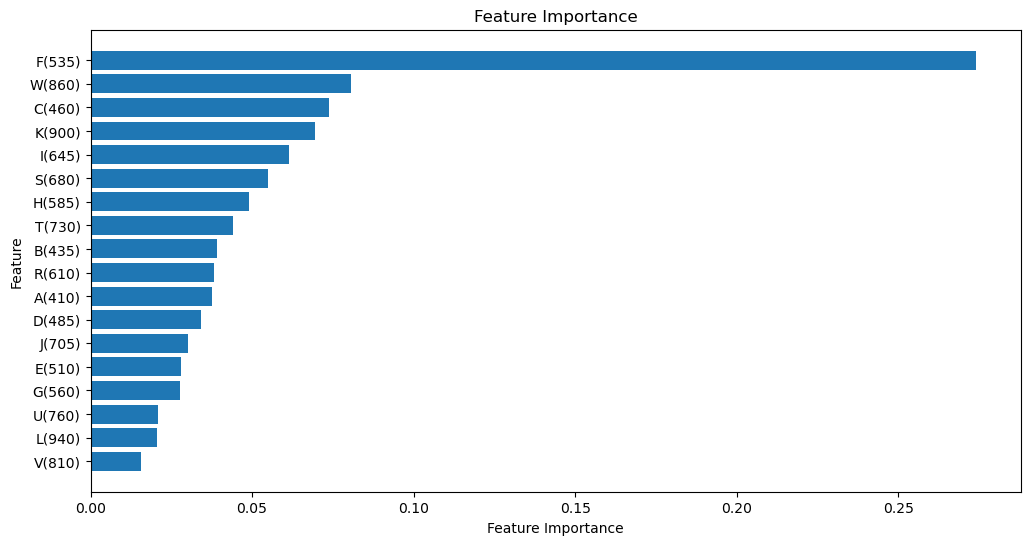

In [51]:
# Apply feature importance analysis for RandomForestRegressor
print("RandomForestRegressor Feature Importance:")
num_targets=13
feature_importance_analysis(best_rf_model, X, X.columns)


KNeighborsRegressor Feature Importance:
   Feature  Importance
0   A(410)    1.873801
1   B(435)    1.873801
16  L(940)    1.873801
15  K(900)    1.873801
14  W(860)    1.873801
13  V(810)    1.873801
12  U(760)    1.873801
11  J(705)    1.873801
10  S(680)    1.873801
9   I(645)    1.873801
8   R(610)    1.873801
7   H(585)    1.873801
6   G(560)    1.873801
5   F(535)    1.873801
4   E(510)    1.873801
3   D(485)    1.873801
2   C(460)    1.873801
17  T(730)    1.873801


C:\Users\Vanshika\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(


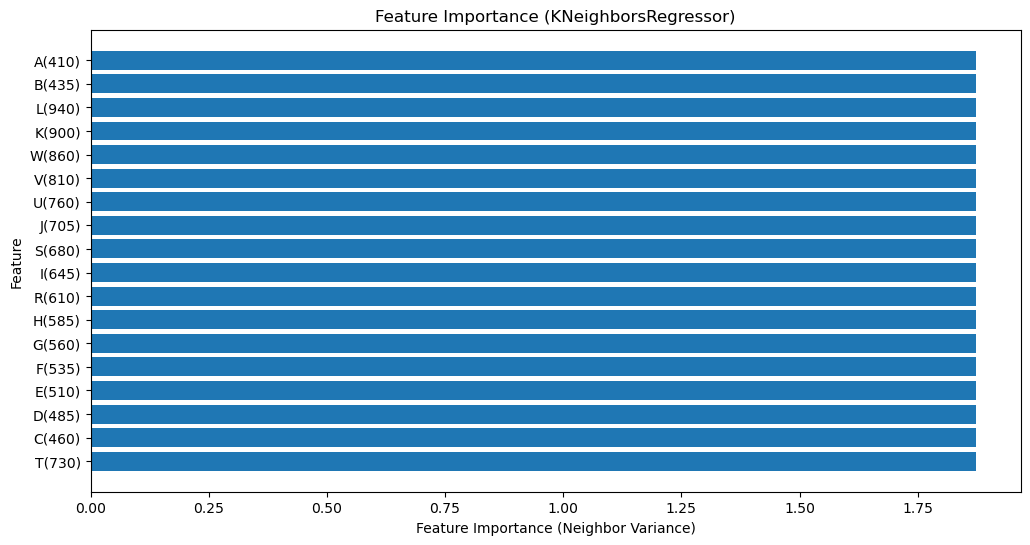

In [52]:
def feature_importance_analysis_knn(model, X):
    # Compute the variance of each feature across neighbors for each sample
    neighbor_variances = np.var(model.kneighbors(X)[0], axis=1).mean(axis=0)

    # Create DataFrame
    importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': neighbor_variances})
    importance_df = importance_df.sort_values(by='Importance', ascending=False)

    # Display importance values
    print(importance_df)

    # Plot feature importances
    plt.figure(figsize=(12, 6))
    plt.barh(importance_df['Feature'], importance_df['Importance'], align='center')
    plt.xlabel('Feature Importance (Neighbor Variance)')
    plt.ylabel('Feature')
    plt.title('Feature Importance (KNeighborsRegressor)')
    plt.gca().invert_yaxis()
    plt.show()

# Apply feature importance analysis for KNeighborsRegressor
print("\nKNeighborsRegressor Feature Importance:")
feature_importance_analysis_knn(best_knn_model, X)


DecisionTreeRegressor Feature Importance:
   Feature  Importance
5   F(535)    0.231080
6   G(560)    0.141018
10  S(680)    0.101948
14  W(860)    0.095107
15  K(900)    0.088898
0   A(410)    0.070594
12  U(760)    0.057075
1   B(435)    0.055171
16  L(940)    0.045565
13  V(810)    0.029468
9   I(645)    0.026461
3   D(485)    0.020721
2   C(460)    0.016255
8   R(610)    0.016128
4   E(510)    0.001295
7   H(585)    0.001118
17  T(730)    0.001058
11  J(705)    0.001040


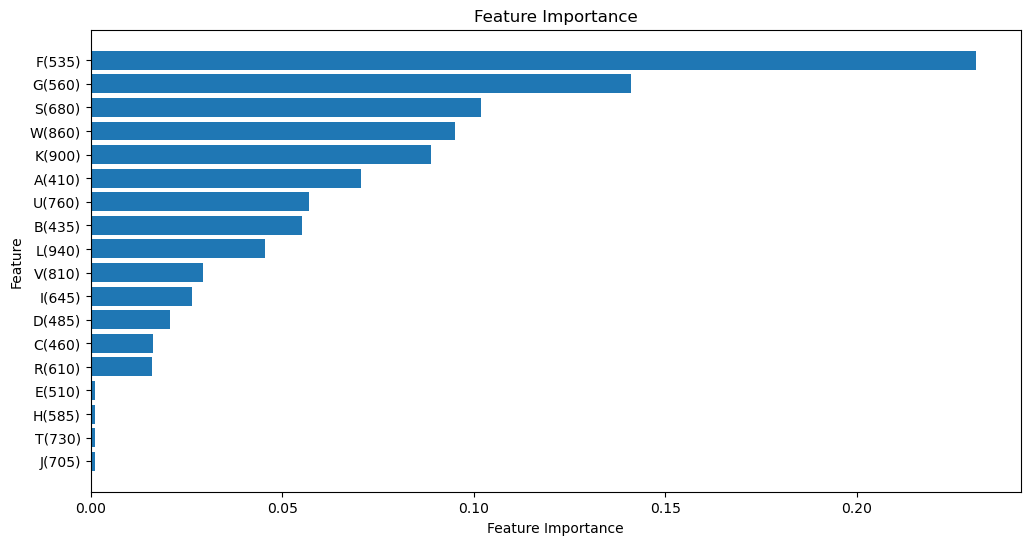

In [53]:
# Apply feature importance analysis for DecisionTreeRegressor
print("\nDecisionTreeRegressor Feature Importance:")
feature_importance_analysis(dt, X, X.columns)


GaussianProcessRegressor Feature Importance:
        Importance
V(810)   26.417166
I(645)   13.007590
U(760)   11.007554
A(410)   10.197516
E(510)    9.633064
C(460)    8.955249
B(435)    8.937170
G(560)    8.412992
H(585)    8.280401
T(730)    7.902433
W(860)    7.643961
D(485)    7.487858
K(900)    7.431364
S(680)    7.407690
L(940)    6.910504
J(705)    6.537773
R(610)    6.165586
F(535)    5.742100


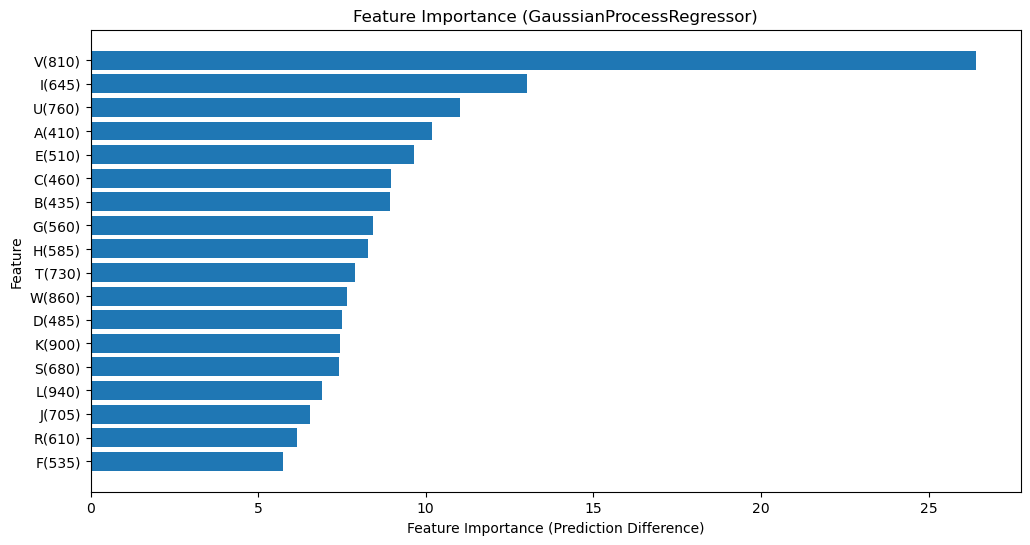

In [54]:
def feature_importance_analysis_gpr(model, X, feature_names):
    # Calculate predictions with all features
    y_pred_all = model.predict(X)

    # Initialize dictionary to store feature importance scores
    feature_importances = {}

    # Iterate over each feature
    for i, feature in enumerate(feature_names):
        # Vary one feature while keeping others constant
        X_variation = X.copy()
        X_variation[:, i] = np.mean(X[:, i])

        # Calculate predictions with the varied feature
        y_pred_variation = model.predict(X_variation)

        # Calculate the difference in predictions caused by varying the feature
        feature_importance = np.abs(y_pred_variation - y_pred_all).mean()

        # Store the feature importance score
        feature_importances[feature] = feature_importance

    # Convert the dictionary to a DataFrame
    importance_df = pd.DataFrame.from_dict(feature_importances, orient='index', columns=['Importance'])
    importance_df = importance_df.sort_values(by='Importance', ascending=False)

    # Display importance values
    print(importance_df)
    # Plot feature importances
    plt.figure(figsize=(12, 6))
    plt.barh(importance_df.index, importance_df['Importance'], align='center')
    plt.xlabel('Feature Importance (Prediction Difference)')
    plt.ylabel('Feature')
    plt.title('Feature Importance (GaussianProcessRegressor)')
    plt.gca().invert_yaxis()
    plt.show()

# Apply feature importance analysis for GaussianProcessRegressor
print("\nGaussianProcessRegressor Feature Importance:")
feature_importance_analysis_gpr(gpr, X_train, X.columns)

In [55]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

def evaluate_model(model, X_train, X_test, y_train, y_test):
    # Training predictions
    y_train_pred = model.predict(X_train)
    
    # Testing predictions
    y_test_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    train_rmse=np.sqrt(train_mse)
    
    # Print the metrics
    print(f"Mean Squared Error (MSE): {train_mse}")
    print(f"R-squared (R2) Score: {train_r2}")
    print(f"Mean Absolute Error (MAE): {train_mae}")
    print(f"Root Mean Squared Error (RMSE): {train_rmse}")
    # Apply the function for each model
print("Random Forest Model Evaluation:")
evaluate_model(best_rf_model, X_train, X_test, y_train, y_test)
print("\nKNN Model Evaluation:")
evaluate_model(best_knn_model, X_train, X_test, y_train, y_test)
print("\nDecision Tree Model Evaluation:")
evaluate_model(dt, X_train, X_test, y_train, y_test)
print("\nSVM Model Evaluation:")
evaluate_model(multioutput_svr, X_train, X_test, y_train, y_test)
print("\nGaussian Process Model Evaluation:")
evaluate_model(gpr, X_train, X_test, y_train, y_test)

Random Forest Model Evaluation:
Mean Squared Error (MSE): 1298.8205293301662
R-squared (R2) Score: 0.23568856024025026
Mean Absolute Error (MAE): 11.848681008070795
Root Mean Squared Error (RMSE): 36.03915272769556

KNN Model Evaluation:
Mean Squared Error (MSE): 2395.9167325914405
R-squared (R2) Score: 0.15851387715206774
Mean Absolute Error (MAE): 15.349228000729244
Root Mean Squared Error (RMSE): 48.94810244117171

Decision Tree Model Evaluation:
Mean Squared Error (MSE): 55.728873125
R-squared (R2) Score: 0.9897988904721171
Mean Absolute Error (MAE): 0.3999519230769231
Root Mean Squared Error (RMSE): 7.4651773672833786

SVM Model Evaluation:
Mean Squared Error (MSE): 2891.6775150090098
R-squared (R2) Score: 0.01521651095527608
Mean Absolute Error (MAE): 15.86094071224174
Root Mean Squared Error (RMSE): 53.77432021893917

Gaussian Process Model Evaluation:
Mean Squared Error (MSE): 55.728873129620396
R-squared (R2) Score: 0.9897988904717431
Mean Absolute Error (MAE): 0.3999586222540

In [56]:
import h5py

# Save the GaussianProcessRegressor model as an HDF5 file
h5_file = "gpr_model.h5"
with h5py.File(h5_file, 'w') as f:
    # Convert model attributes to string and save as HDF5 datasets
    f.create_dataset('kernel', data=str(gpr.kernel))
    f.create_dataset('alpha', data=gpr.alpha)
    f.create_dataset('optimizer', data=str(gpr.optimizer))
    f.create_dataset('n_restarts_optimizer', data=gpr.n_restarts_optimizer)
    # Save additional necessary parameters

print(f"Model saved as {h5_file}")

Model saved as gpr_model.h5


In [57]:
pip install h5

     ---------------------------------------- 16.5/16.5 MB 3.2 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.3.0
    Uninstalling typing_extensions-4.3.0:
      Successfully uninstalled typing_extensions-4.3.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Uninstalling numpy-1.21.5:
      Successfully uninstalled numpy-1.21.5
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.6.0 requires daal==2021.4.0, which is not installed.
scipy 1.9.1 requires numpy<1.25.0,>=1.18.5, but you have numpy 2.0.0 which is incompatible.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 2.0.0 which is incompatible.


In [58]:
pip install eli5

     ------------------------------------ 216.2/216.2 kB 824.0 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 133.3/133.3 kB 2.0 MB/s eta 0:00:00
     ---------------------------------------- 47.1/47.1 kB ? eta 0:00:00
     ---------------------------------------- 14.9/14.9 MB 3.1 MB/s eta 0:00:00
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107728 sha256=acc6283e6a5be9ba581f0342320aafc2c3fc66a35bfc95dbf916b29b82d051e8
  Stored in directory: c:\users\vanshika\appdata\local\pip\cache\wheels\7b\26\a5\8460416695a992a2966b41caa5338e5e7fcea98c9d032d055c
Successfully built eli5
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.0
    Uninstalling numpy-2.0.0:
      Successfully uninstalled numpy-2.0.0
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully 

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.6.0 requires daal==2021.4.0, which is not installed.
anaconda-project 0.11.1 requires ruamel-yaml, which is not installed.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 1.24.4 which is incompatible.


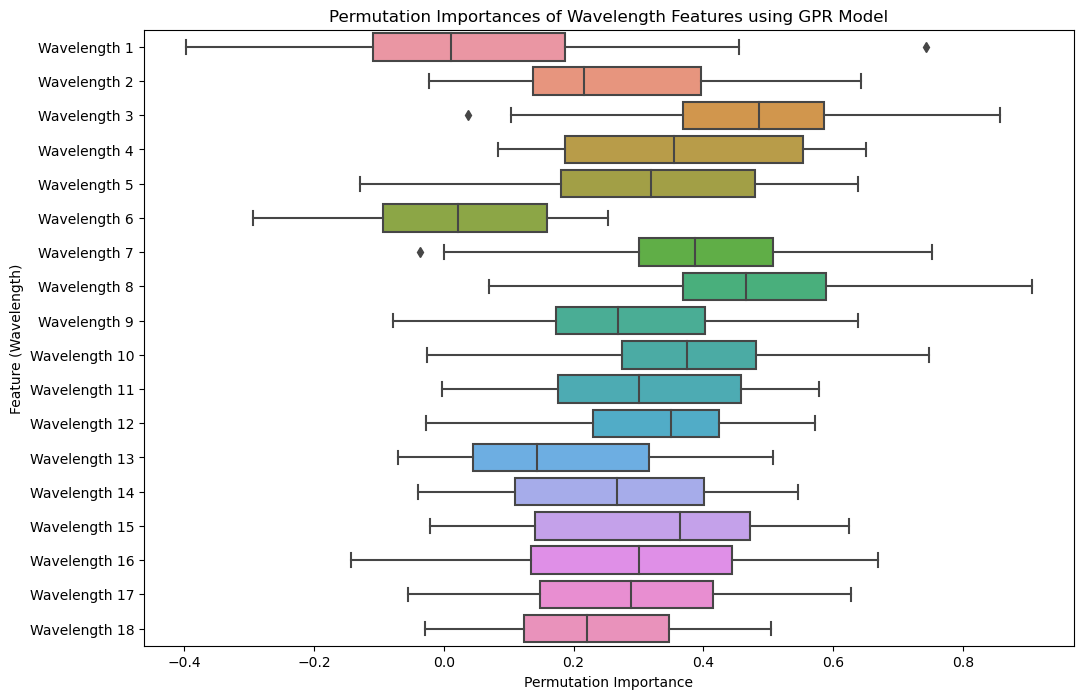

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.inspection import permutation_importance

# Function to compute and plot feature importances using permutation importance
def plot_feature_importances(model, X_test, y_test, feature_names):
    # Compute permutation importance
    perm_importance = permutation_importance(model, X_test, y_test, n_repeats=30, random_state=42)
    importances = perm_importance.importances.T  # Transpose to have shape (n_repeats, n_features)
    
    # Create a DataFrame for plotting
    importance_df = pd.DataFrame(importances, columns=feature_names)
    
    # Plot box plots
    plt.figure(figsize=(12, 8))
    sns.boxplot(data=importance_df, orient='h')
    plt.xlabel('Permutation Importance')
    plt.ylabel('Feature (Wavelength)')
    plt.title('Permutation Importances of Wavelength Features using GPR Model')
    plt.show()

# Assuming `X_test` is your test set features and `feature_names` is the list of feature names
feature_names = [f'Wavelength {i+1}' for i in range(X_test.shape[1])]

# Plot feature importances for GPR model
plot_feature_importances(gpr, X_test, y_test, feature_names)

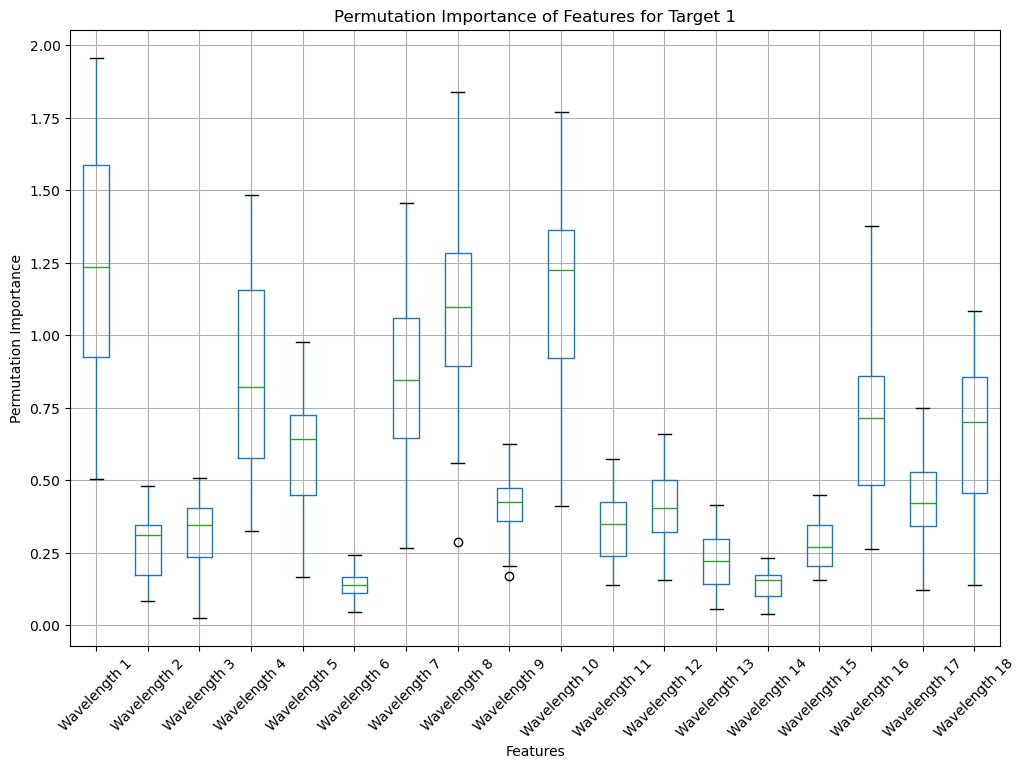

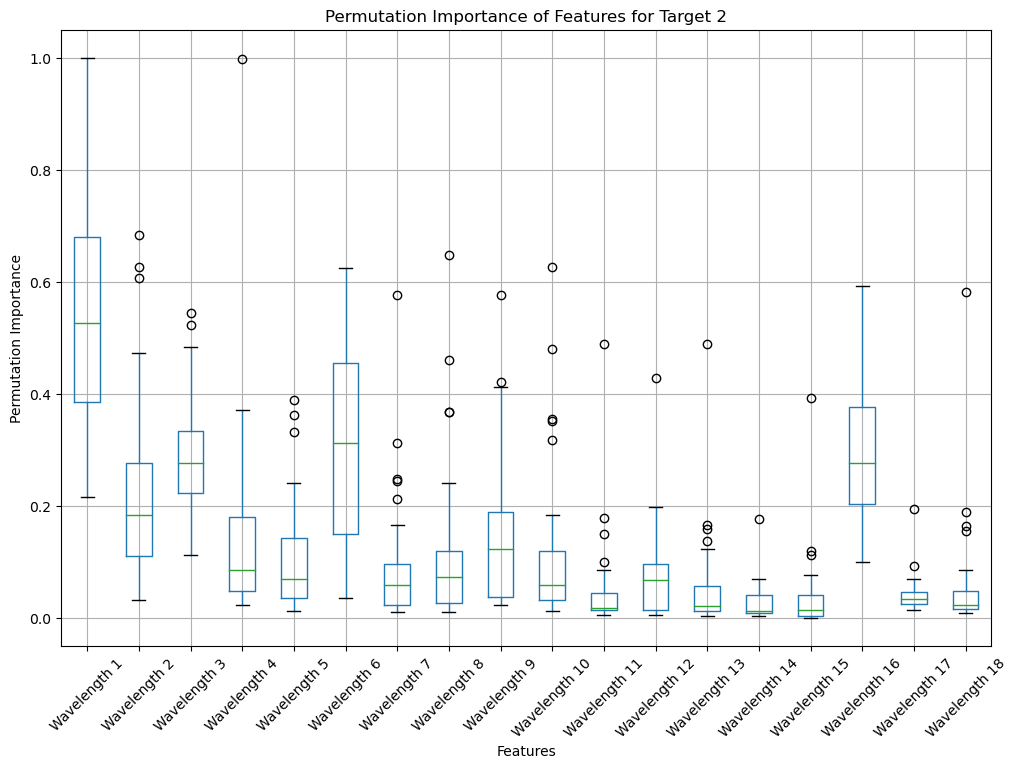

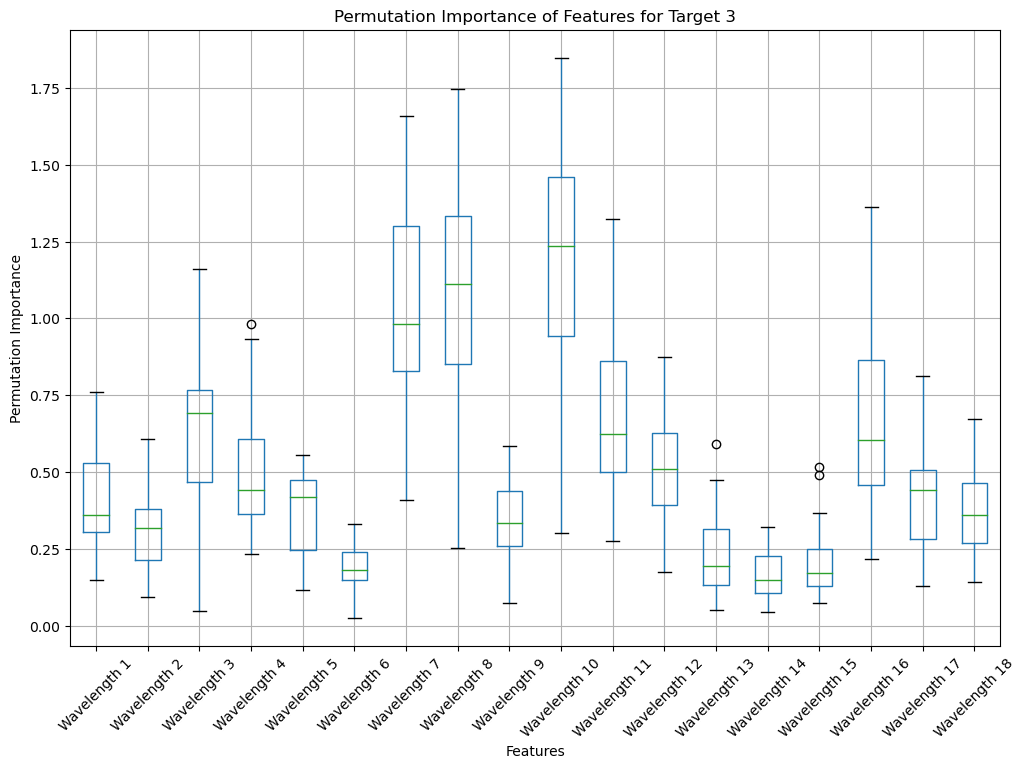

C:\Users\Vanshika\anaconda3\lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


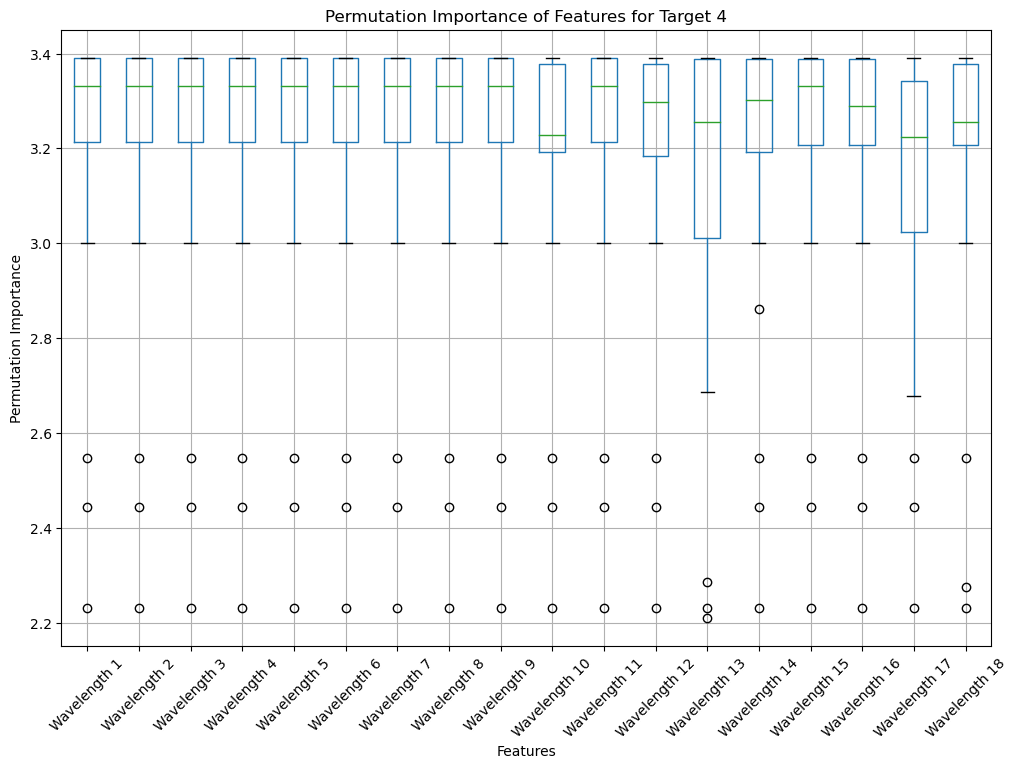

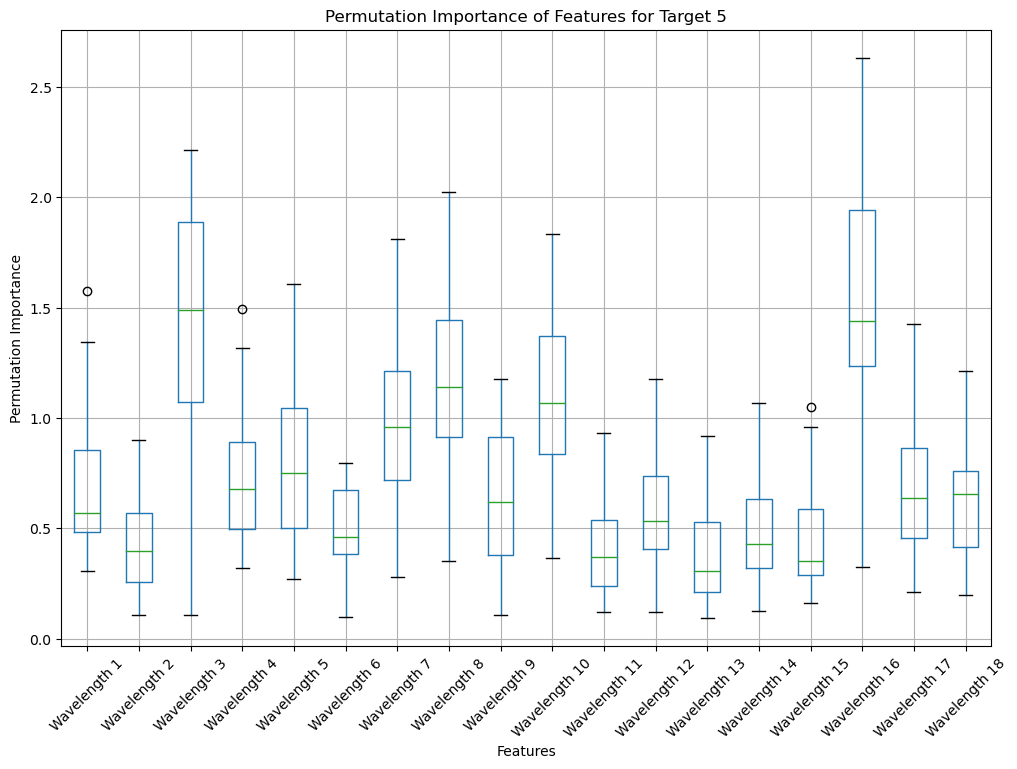

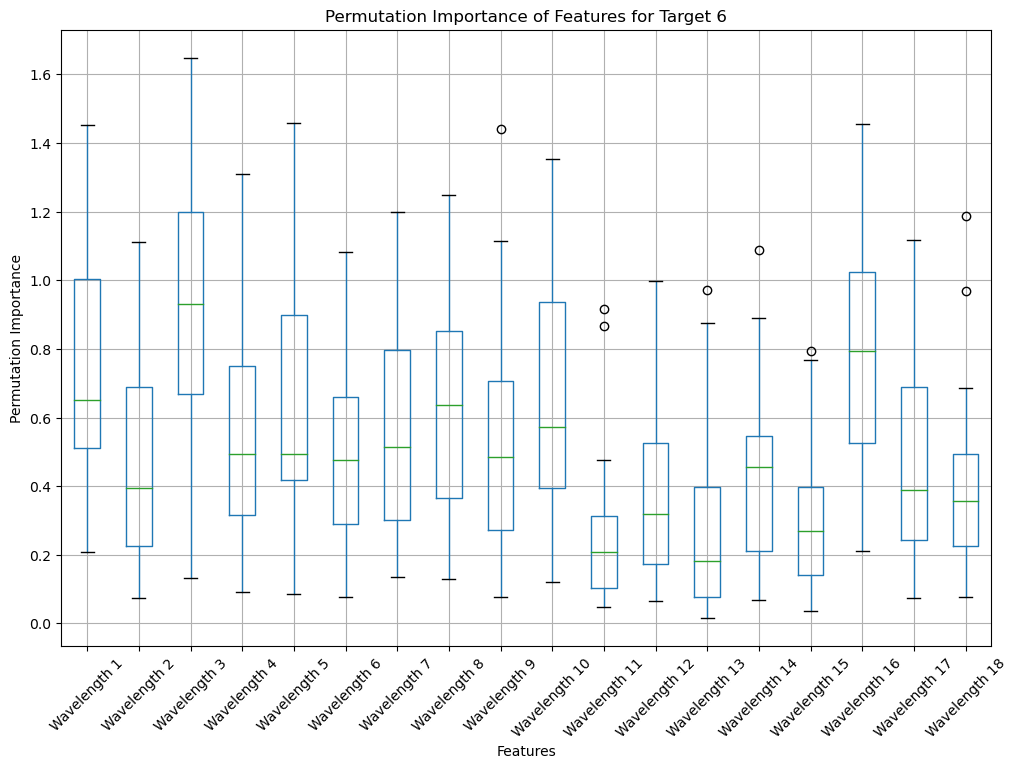

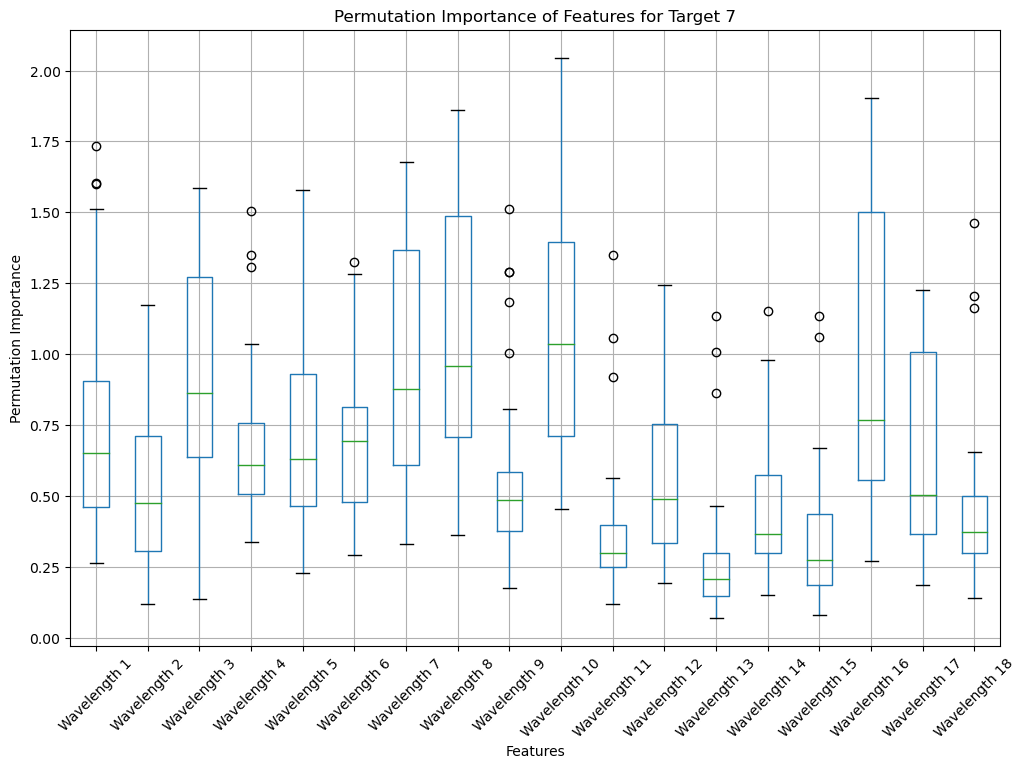

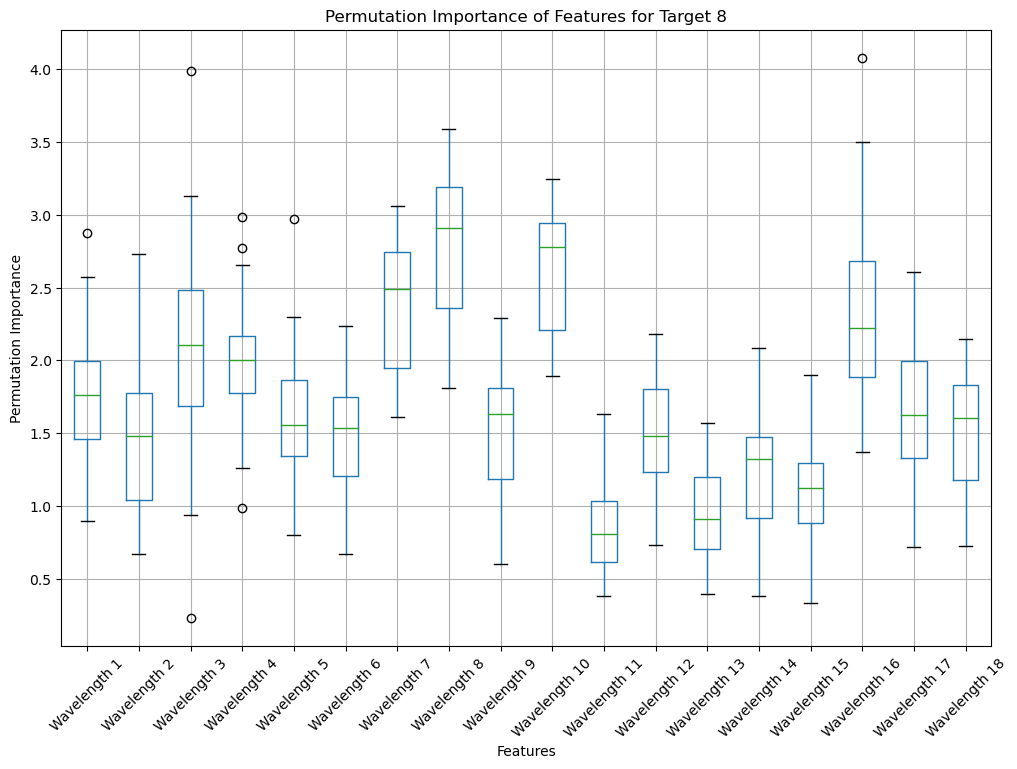

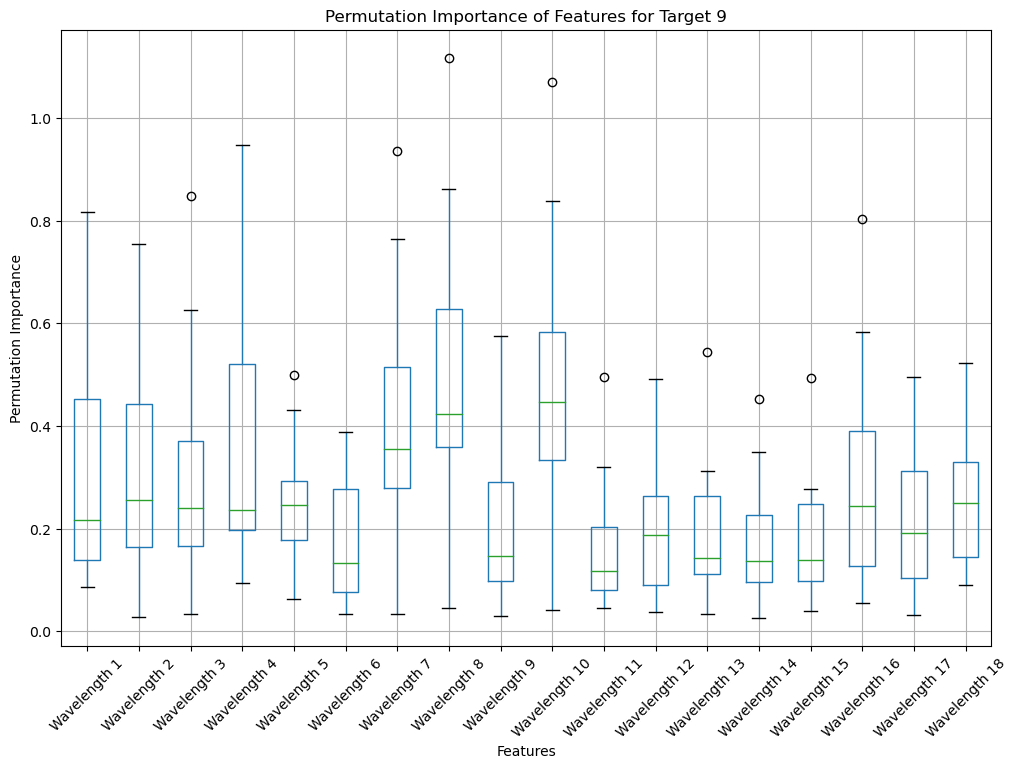

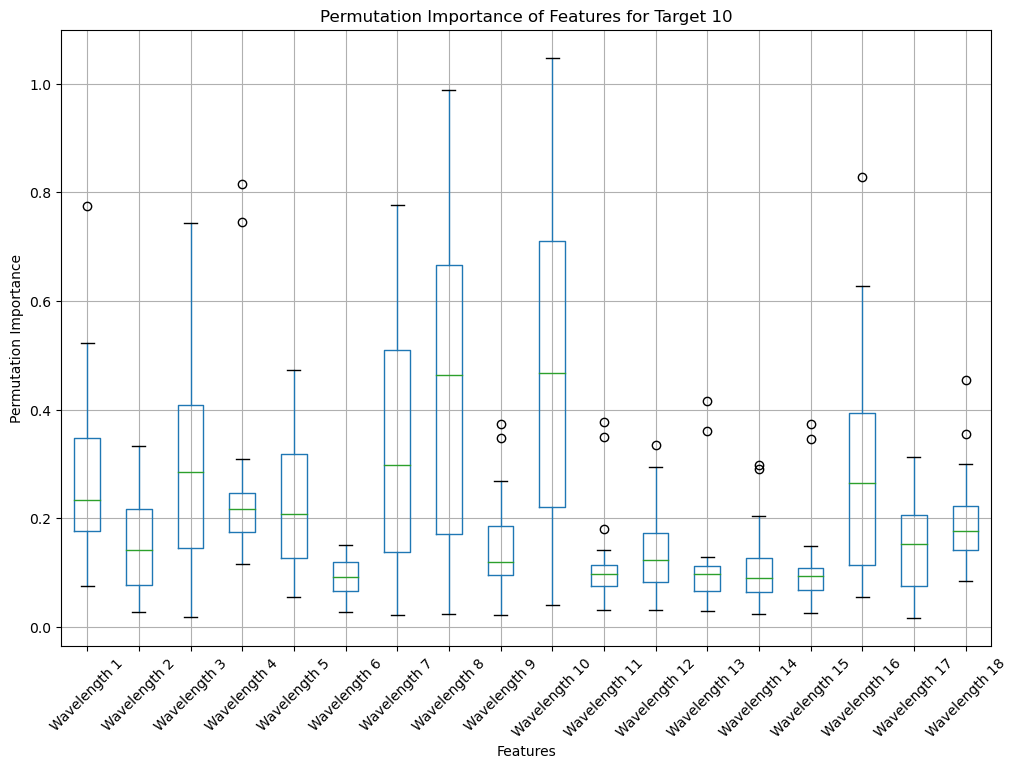

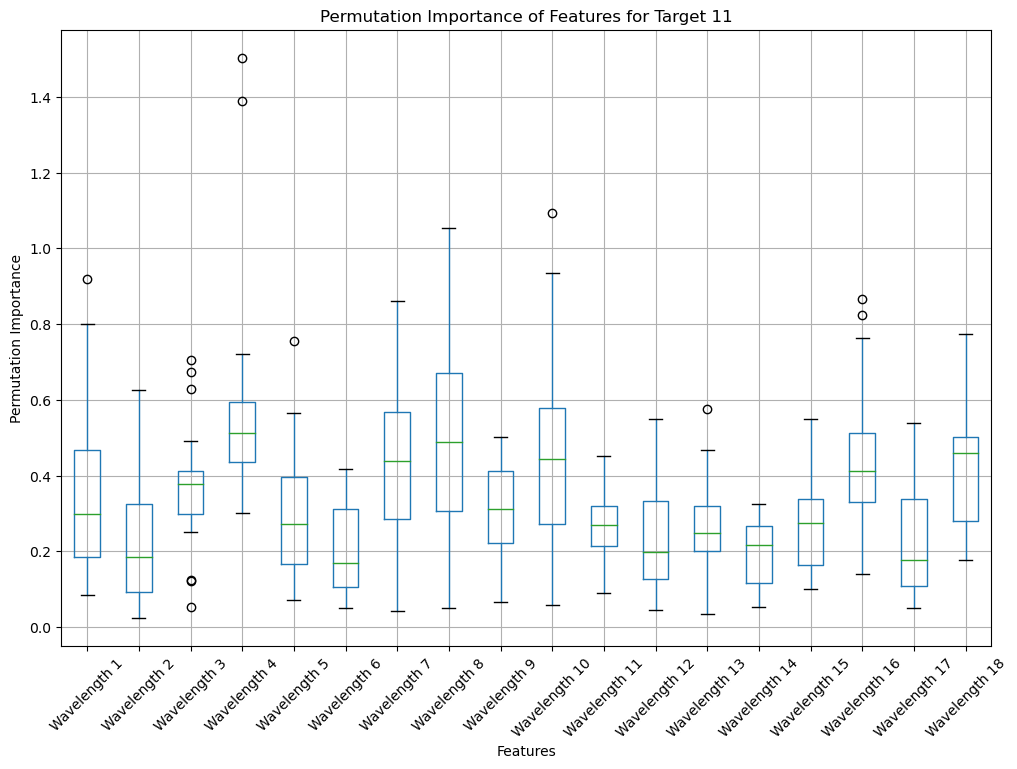

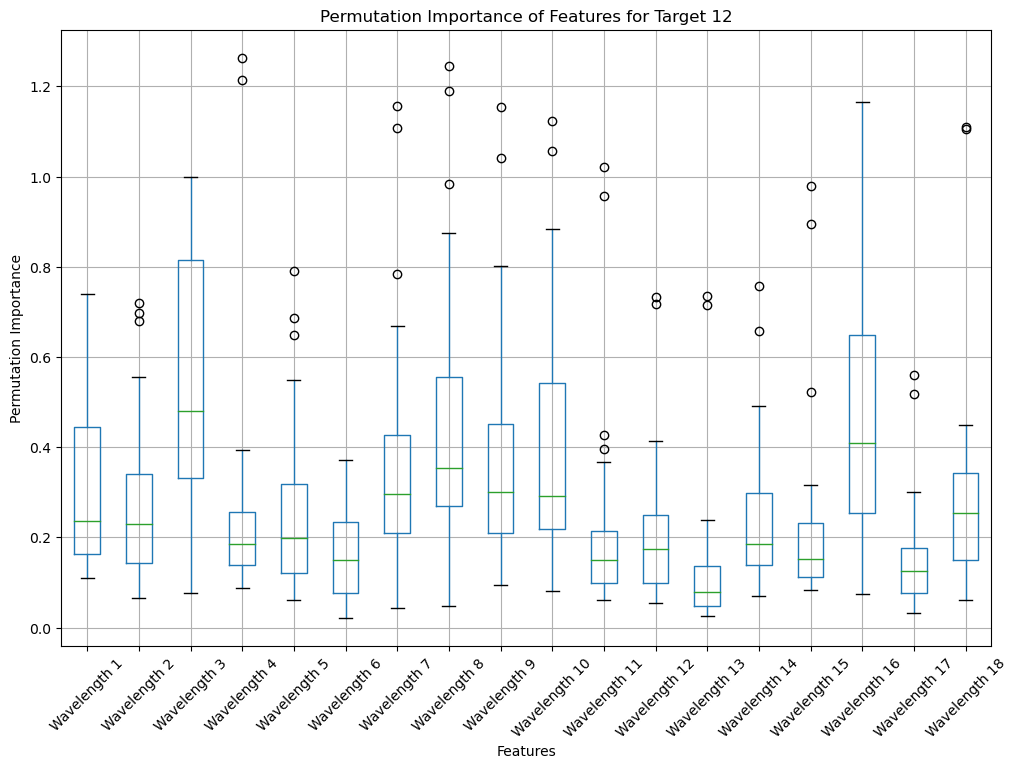

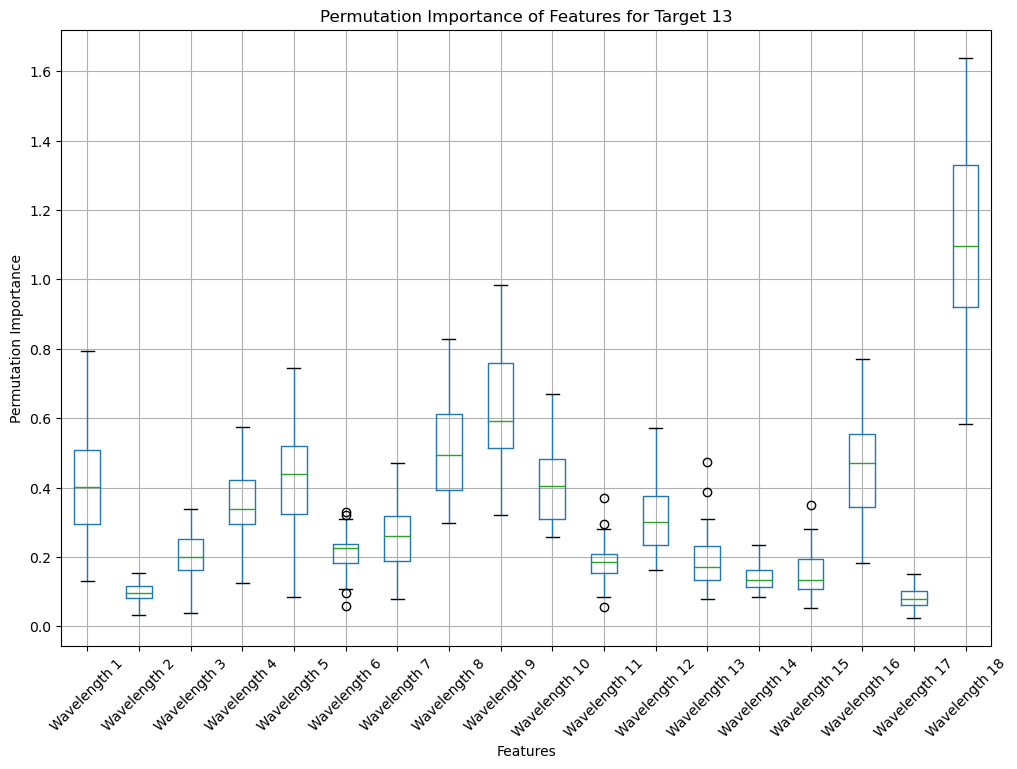

In [60]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.inspection import permutation_importance
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

def plot_feature_importances_for_each_target(X_test, y_test, feature_names):
    # Ensure y_test is a DataFrame for easier handling of multiple targets
    y_test_df = pd.DataFrame(y_test)
    
    for i in range(y_test_df.shape[1]):
        y_test_target = y_test_df.iloc[:, i].values
        
        # Fit a separate GPR model for each target
        model = GaussianProcessRegressor(kernel=RBF(length_scale=1))
        model.fit(X_test, y_test_target)
        
        # Get permutation importances
        perm_importance = permutation_importance(model, X_test, y_test_target, n_repeats=30, random_state=0)
        importances = perm_importance.importances
        
        # Create a DataFrame for plotting
        importance_df = pd.DataFrame(importances, index=feature_names).T
        
        # Plot box plots
        plt.figure(figsize=(12, 8))
        importance_df.boxplot()
        plt.title(f'Permutation Importance of Features for Target {i+1}')
        plt.xlabel('Features')
        plt.ylabel('Permutation Importance')
        plt.xticks(rotation=45)
        plt.show()

# Define the feature names
feature_names = [f'Wavelength {i+1}' for i in range(X_test.shape[1])]

# Assuming y_test is a 2D array with shape (n_samples, n_targets)
# Convert y_test to DataFrame if it's not already
if not isinstance(y_test, pd.DataFrame):
    y_test = pd.DataFrame(y_test)

# Plot feature importances for each target variable
plot_feature_importances_for_each_target(X_test, y_test, feature_names)

In [61]:
import joblib
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

def calculate_score(metrics):
    # Define weights for each metric
    mse_weight = 0.5
    r2_weight = 0.3
    mae_weight = 0.2
    
    # Calculate the score
    score = (mse_weight * metrics['mse']) + (r2_weight * metrics['r2']) - (mae_weight * metrics['mae'])
    return score

def get_metrics(model, X_train, X_test, y_train, y_test):
    # Training predictions
    y_train_pred = model.predict(X_train)
    
    # Testing predictions
    y_test_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    # Return metrics as dictionary
    return {'mse': test_mse, 'r2': test_r2, 'mae': test_mae}

# Define models (ensure these variables are defined and models are trained)
models = {
    'KNN': best_knn_model,
    'Decision Tree': dt,
    'SVM': multioutput_svr,
    'Random Forest': best_rf_model,
    'Gaussian Process': gpr
}

# Calculate scores for each model
scores = {}
for name, model in models.items():
    metrics = get_metrics(model, X_train, X_test, y_train, y_test)
    score = calculate_score(metrics)
    scores[name] = score
    print(f"Score for {name}: {score}")

# Find the best model
best_model_name = max(scores, key=scores.get)
best_model_score = scores[best_model_name]

print(f"The best model is {best_model_name} with a score of {best_model_score}.")

Score for KNN: 1904.1024378159439
Score for Decision Tree: 2214.476079789313
Score for SVM: 2285.3484677919137
Score for Random Forest: 2155.3521819233374
Score for Gaussian Process: 3415.2334956734767
The best model is Gaussian Process with a score of 3415.2334956734767.


In [1]:
def preprocess_user_input(user_input, imputer_X, scaler_X):
    # Impute missing values
    user_input_imputed = imputer_X.transform(user_input)
    
    # Scale features
    user_input_scaled = scaler_X.transform(user_input_imputed)
    
    return user_input_scaled

# Example user input (replace this with the actual user input)
user_input = []

print("Enter the 18 input values:")
for i in range(18):
    value = float(input(f"Enter value {i + 1}: "))
    user_input.append(value)

# Convert the user input to a numpy array
user_input_array = np.array([user_input])
# Preprocess user input
user_input_scaled = preprocess_user_input(user_input_array, imputer_X, scaler_X)

# Make predictions using all models
predictions_all_models = {}
for model_name, model in models.items():
    predictions = model.predict(user_input_scaled)
    predictions_all_models[model_name] = predictions[0]

# Display predictions for all models
for model_name, predictions in predictions_all_models.items():
    print(f"Predictions using {model_name}:")
    for i, prediction in enumerate(predictions):
        print(f"{y.columns[i]}: {prediction}")
    print("\n")


Enter the 18 input values:


KeyboardInterrupt: Interrupted by user